In [41]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models



In [42]:

df = pd.read_csv("fmnist_small.csv")

print(df.shape)
print(df.head())

(6000, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      9       0       0       0       0       0       0       0       0   
1      7       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       1       0       0   
3      8       0       0       0       0       0       0       0       0   
4      8       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         7         0        50       205       196   
1       0  ...         0         0         0         0         0         0   
2       0  ...       142       142       142        21         0         3   
3       0  ...         0         0         0         0         0         0   
4       0  ...       213       203       174       151       188        10   

   pixel781  pixel782  pixel783  pixel784  
0       213       

In [43]:
df=pd.read_csv("fmnist_small.csv")

In [44]:
X_pixels = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [45]:
images = X_pixels.reshape(-1, 28, 28).astype(np.uint8)

In [46]:
def extract_ml_features(img):
    img = cv2.resize(img, (128, 128))

    hog_features = hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )

    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    return np.hstack((hog_features, hist))


X = []

for img in images:
    features = extract_ml_features(img)
    X.append(features)

X = np.array(X)
y = np.array(y)


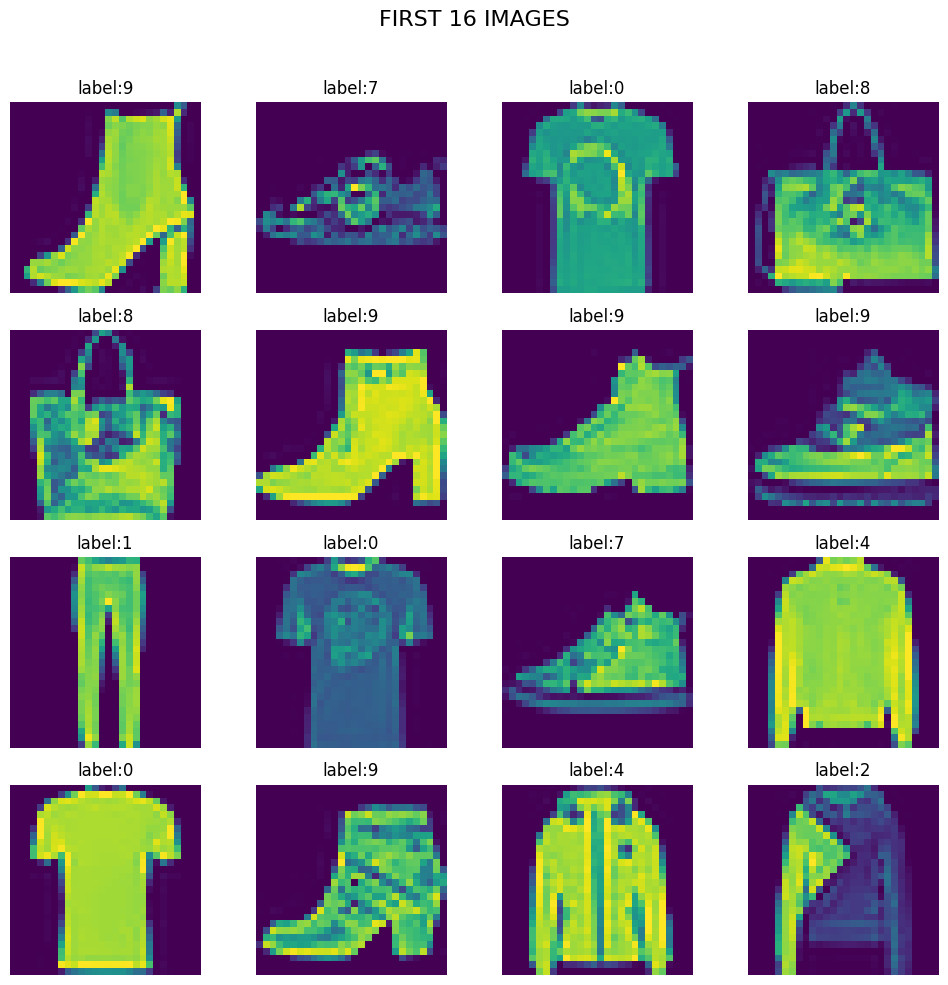

In [47]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("FIRST 16 IMAGES",fontsize=16)
for i,ax in enumerate(axes.flat):
    img=df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"label:{df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [48]:


model= StandardScaler()
X = model.fit_transform(X)


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [50]:
model2=RandomForestClassifier(n_estimators=100, random_state=42)

model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

print("ML Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ML Accuracy: 0.995
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1194
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.99      1200
   macro avg       0.25      0.25      0.25      1200
weighted avg       0.99      0.99      0.99      1200



c:\Users\Sagar Pathania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sagar Pathania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sagar Pathania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

In [51]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
      super(SimpleCNN, self).__init__()
      self.conv = nn.Sequential(
      nn.Conv2d(1, 32, 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2),
      nn.Conv2d(32, 64, 3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2)
)
      self.fc = nn.Sequential(
      nn.Linear(64 * 7 * 7, 128),
      nn.ReLU(),
      nn.Linear(128, num_classes)
)

def forward(self, x):
  x = self.conv(x)
  x = x.view(x.size(0), -1)
  return self.fc(x)

In [52]:
X_tensor = torch.tensor(images).unsqueeze(1).float() / 255.0
y_tensor = torch.tensor(y)


train_X, test_X, train_y, test_y = train_test_split(
X_tensor, y_tensor, test_size=0.2, random_state=42
)


train_loader = DataLoader(list(zip(train_X, train_y)), batch_size=32, shuffle=True)
test_loader = DataLoader(list(zip(test_X, test_y)), batch_size=32)


model = SimpleCNN(num_classes=len(np.unique(y)))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [56]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)
        return x


In [59]:
model = SimpleCNN(num_classes=10)


In [61]:
model.eval()
y_true, y_pred_dl = [], []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred_dl.extend(preds.numpy())

print("DL Accuracy:", accuracy_score(y_true, y_pred_dl))


DL Accuracy: 0.0008333333333333334


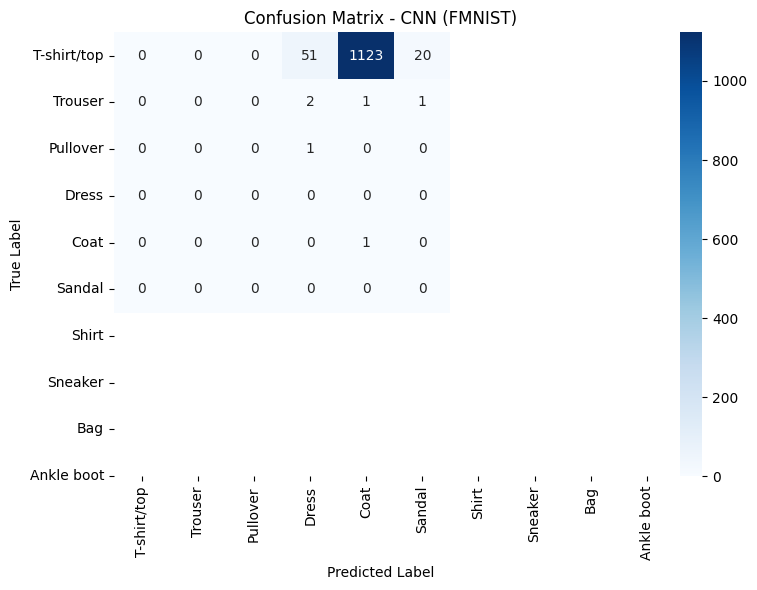

In [63]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

cm = confusion_matrix(y_true, y_pred_dl)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN (FMNIST)")
plt.tight_layout()
plt.show()